# APS1070
#### Basic Principles and Models - Project 1
**Deadline: Oct 1, 9PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

**Name**: Danmeng Cui  *(here and elsewhere, please replace the underscore with your answer)*

Student ID: 1004004356

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).


 <font color='red'>**Remember to push your work on GitHub and share the link of your private repo on Quercus.**</font> 




# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [1]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
dataset

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? 30
* How many observations have a 'mean area' of greater than 700? 171
* How many participants tested `Malignant`? 212
* How many participants tested `Benign`? 357

In [2]:
dataset.data
dataset.target
dataset.feature_names

import pandas as pd
df= pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.insert(30, "target", dataset.target)
df

print("Number of features:", len(dataset.feature_names))
print("Number of observations have a mean area greater than 700:", sum(df['mean area']>=700) )
print("Number of participants tested Malignant:", sum(df['target']==0))
print("Number of participants tested Benign:", sum(df['target']==1))


Number of features: 30
Number of observations have a mean area greater than 700: 171
Number of participants tested Malignant: 212
Number of participants tested Benign: 357


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

In [3]:
from sklearn import neighbors
X=dataset.data
y=dataset.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Based on your observation, what is the advantage of standardization? **[0.6]**




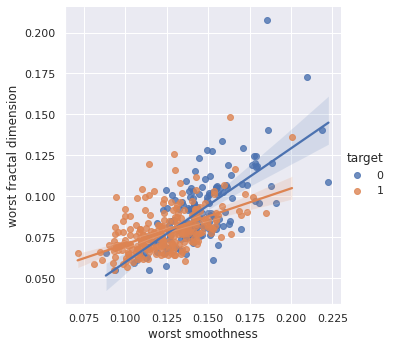

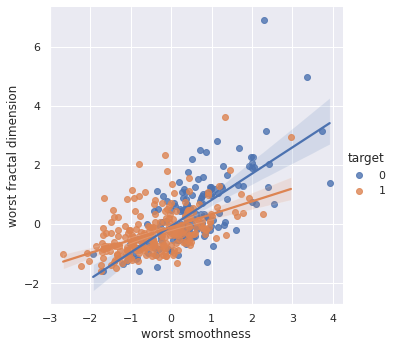

In [4]:
#Training Set Construction & Plotting
df_train= pd.DataFrame(X_train, columns=dataset.feature_names)
df_train.insert(30, "target", y_train)
import seaborn as sns; sns.set_theme(color_codes=True)
g = sns.lmplot(x="worst smoothness", y="worst fractal dimension", hue="target", data=df_train)

# Normalize
X_train_norm=X_train.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_norm)
X_norm = scaler.transform(X_train_norm)
df_train_norm= pd.DataFrame(X_norm, columns=dataset.feature_names)
df_train_norm.insert(30, "target", y_train)
g = sns.lmplot(x="worst smoothness", y="worst fractal dimension", hue="target", data=df_train_norm)
#Conclusion: By observing the two graphs, the graphs didn't change a lot, only the scale of x-axis and y-axis has changed. 
#Advantage of standardization: The advantage of being normalized is that we can compare the features regardless their units.

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**




[0.9171202531645569, 0.9170886075949367, 0.9272151898734178, 0.927120253164557, 0.919620253164557, 0.9246518987341773, 0.9321518987341773, 0.9321518987341773, 0.9246202531645569, 0.9346518987341772, 0.9346518987341772, 0.9321202531645569, 0.9221518987341772, 0.9296835443037976, 0.9221518987341772, 0.9246202531645569, 0.9120569620253164, 0.9195886075949368, 0.9120886075949368, 0.9145886075949367, 0.9070253164556963, 0.9095253164556961, 0.9070569620253165, 0.9070253164556961, 0.9045253164556962, 0.9095569620253163, 0.9095569620253163, 0.9095569620253163, 0.9095569620253163, 0.9095569620253163, 0.9045569620253164, 0.9070569620253165, 0.9070569620253165, 0.9095569620253166, 0.9095569620253166, 0.9070569620253164, 0.9070569620253165, 0.9095569620253166, 0.9095569620253166, 0.9095569620253166, 0.9070569620253165, 0.9095569620253166, 0.9095569620253166, 0.9095569620253166, 0.9020569620253165, 0.9070569620253165, 0.9020253164556962, 0.9095569620253166, 0.9045569620253164, 0.9070569620253164, 0

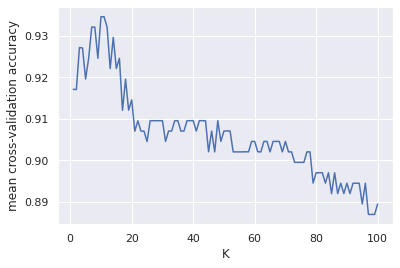

In [6]:
#1. Train a KNN Classifier using cross-validation on the dataset. Sweep k (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs k.
import numpy as np
from sklearn import neighbors
from sklearn.model_selection import cross_validate

mean_cross_validation=[]
for k in range(1,101):
  knn= neighbors.KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  scores = cross_validate(knn, X_train, y_train, cv=5)
  mean_cross_validation.append(scores['test_score'].mean())

import matplotlib.pyplot as plt
plt.plot(range(1,101),mean_cross_validation)
plt.xlabel('K')
plt.ylabel("mean cross-validation accuracy")
print(mean_cross_validation)


In [7]:
#2. What is the best k? What is the highest cross-validation accuracy?
print(max(mean_cross_validation))
print(mean_cross_validation.index(max(mean_cross_validation))+1)
#Therefore, the best k is 10, the corresponding highest cross-validation accuracy is 93.46518987341772%.

0.9346518987341772
10


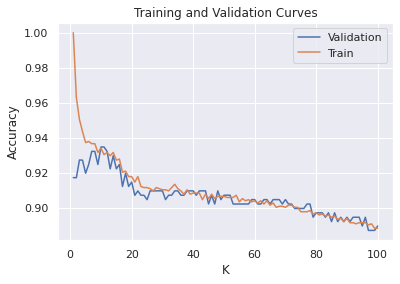

In [8]:
#3. Comment on which ranges of k lead to underfitted or overfitted models (hint: compare training and validation curves!).
import numpy as np
from sklearn import neighbors
from sklearn.model_selection import cross_validate
mean_cross_validation_test=[]
mean_cross_validation_train=[]
for k in range(1,101):
  knn= neighbors.KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  scores = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True)
  mean_cross_validation_test.append(scores['test_score'].mean())
  mean_cross_validation_train.append(scores['train_score'].mean())

import matplotlib.pyplot as plt
plt.plot(range(1,101),mean_cross_validation_test,label="Validation")
plt.plot(range(1,101),mean_cross_validation_train, label="Train")
plt.xlabel('K')
plt.ylabel("Accuracy")
plt.title("Training and Validation Curves")
plt.legend()
#When k=10, it has the highest accuarcy, which means when k<10, the model is underfitted, when k>10, the model is overfitted. 
#The plot below further proved that it is underfitted when k<10, since the two lines are far apart; it is overfitted when k>10. 

## Part 3: Feature Selection [4 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use the following link to get familiar with extracting the feature impotance order of machine learning algorithms in Python: 

https://machinelearningmastery.com/calculate-feature-importance-with-python/

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to remove another feature. To do that we fit a new decision tree to the remaining features and identify the least important feature. 


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[3]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Each time, removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 1, fit a new tree on the reduced dataset and follow all the steps until you meet the stop condition. 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [9]:
import numpy as np
from sklearn import neighbors
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


#Full X_train
X_train_full=X_train.copy()
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train_full,y_train) # Fit full X_train to decision Tree

importance = dt.feature_importances_ #Calculate the importance for X_train_full
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v)) #print the importance scores for each feature

full_mean_cross_validation=[]
for k in range(1,101):
  knn= neighbors.KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_full, y_train)
  scores = cross_validate(knn, X_train_full, y_train, cv=5)
  full_mean_cross_validation.append(scores['test_score'].mean())
print(full_mean_cross_validation) #full X_train accuracy scores from k=1-100
print(max(full_mean_cross_validation)) #0.9321518987341773

#Delete the least important feature each time:
import numpy as np
from sklearn import neighbors
from sklearn.model_selection import cross_validate
def most_accurate(x_train, y_train): 
  mean_validation_test = []
  for k in range(1,101):
      knn= neighbors.KNeighborsClassifier(n_neighbors=k)
      knn.fit(x_train, y_train)
      scores = cross_validate(knn, x_train, y_train, cv=5)
      mean_validation_test.append(scores['test_score'].mean())
  most_accurate_value = max(mean_validation_test)
  most_accurate_k=mean_validation_test.index(most_accurate_value)+1
  return [most_accurate_value, most_accurate_k] #returns the highest accuracy in the mean_validation_test[]

best_feature_acc_full=max(full_mean_cross_validation)
def Feature_selector (x_train , y_train , tr=0.95): 
    best_mcv_score=[max(full_mean_cross_validation)] #Build an empty list to store the best accuracy score each time to delete a feature
    best_mcv_k=[(mean_cross_validation.index(max(mean_cross_validation))+1)] #Build an empty list to store the best accuracy k value each time to delete a feature
    list_of_deleted_features=['no feature drop'] #Build an empty list to store all the deleted feature
    featurenames=dataset.feature_names.copy()
    while (x_train.shape[1]>1):
        dt = tree.DecisionTreeClassifier()
        dt.fit(x_train,y_train)
        feature_importance= dt.feature_importances_ #a list of features' importance
        min_importance_index=np.argmin(feature_importance)#Find the location of minimum importance 
        x_train= np.delete(x_train, min_importance_index, axis=1) #drop the least important features corresponding data
        list_of_deleted_features.append(featurenames[min_importance_index])
        featurenames=np.delete(featurenames, min_importance_index, axis=0)
        best_feature_acc_current= most_accurate(x_train, y_train)[0] #most accurate score 
        best_feature_acc_current_k=most_accurate(x_train, y_train)[1]
        if best_feature_acc_current * tr > best_feature_acc_current: 
            return best_mcv_score, best_mcv_k, list_of_deleted_features
        best_mcv_score.append(best_feature_acc_current)
        best_mcv_k.append(best_feature_acc_current_k)
    return best_mcv_score, best_mcv_k, list_of_deleted_features
 
FS=Feature_selector (X_train ,y_train , tr=0.95)
AC=FS[0]
K=FS[1]
FN=FS[2]
print(FS)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00503
Feature: 8, Score: 0.02735
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.04749
Feature: 14, Score: 0.00139
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.01032
Feature: 20, Score: 0.08615
Feature: 21, Score: 0.02784
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00990
Feature: 26, Score: 0.01016
Feature: 27, Score: 0.72811
Feature: 28, Score: 0.03015
Feature: 29, Score: 0.01609
[0.9171202531645569, 0.9170886075949367, 0.9272151898734178, 0.927120253164557, 0.919620253164557, 0.9246518987341773, 0.9321518987341773, 0.9321518987341773, 0.924620253

Text(0.5, 1.0, 'mean cross-validation accuracy vs. the number of features ')

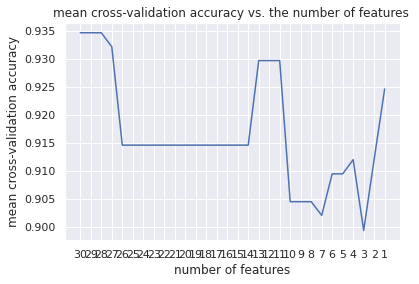

In [10]:
#Visualize your results by plotting the mean cross-validation accuracy (with a tuned k on y axis) vs. the number of features (x axis). 
#This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. [0.5]
import matplotlib.pyplot as plt
F=['30','29','28','27','26','25','24','23','22','21','20','19','18','17','16','15','14','13','12','11','10','9','8','7','6','5','4','3','2','1']
plt.plot(F, AC)
plt.xlabel('number of features')
plt.ylabel("mean cross-validation accuracy")
plt.title("mean cross-validation accuracy vs. the number of features ")


Text(0.5, 1.0, 'k vs. the number of features ')

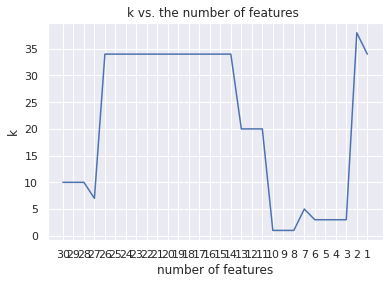

In [11]:
#Plot the best value of k (y-axis) vs. the number of features. 
#This plot explains the trend of number of neighbours with respect to the number of features. [0.5]
import matplotlib.pyplot as plt
F=['30','29','28','27','26','25','24','23','22','21','20','19','18','17','16','15','14','13','12','11','10','9','8','7','6','5','4','3','2','1']
plt.plot(F,K)
plt.xlabel('number of features')
plt.ylabel("k")
plt.title("k vs. the number of features ")

## Part 4: Standardization [1.5 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) **[0.5]**

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 0.95\%.  **[0.5]**
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?) **[0.5]**


In [12]:
#Full X_train
X_train_full__norm=X_train_full.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_full__norm)
X_full_norm = scaler.transform(X_train_full__norm)

full_mean_cross_validation_norm=[]
for k in range(1,101):
  knn= neighbors.KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_full_norm, y_train)
  scores = cross_validate(knn, X_full_norm, y_train, cv=5)
  full_mean_cross_validation_norm.append(scores['test_score'].mean())
print(full_mean_cross_validation_norm) #full X_train accuracy scores from k=1-100
print(max(full_mean_cross_validation_norm)) #0.9674367088607594

[0.9522468354430378, 0.944746835443038, 0.9623734177215189, 0.9623734177215189, 0.9522784810126582, 0.9548101265822785, 0.9649367088607596, 0.9649367088607596, 0.9598417721518986, 0.9674367088607594, 0.9649050632911391, 0.9624050632911393, 0.9599050632911392, 0.9624050632911393, 0.9548417721518987, 0.9523417721518987, 0.9498417721518987, 0.9523417721518987, 0.9473101265822784, 0.9498101265822785, 0.9498101265822785, 0.9523417721518987, 0.9498417721518987, 0.9498417721518987, 0.9523417721518987, 0.952373417721519, 0.9422784810126581, 0.954873417721519, 0.9473101265822784, 0.952373417721519, 0.9422468354430379, 0.9473101265822784, 0.9472784810126582, 0.9473101265822784, 0.9447784810126582, 0.9498417721518987, 0.9472784810126582, 0.9447784810126582, 0.944746835443038, 0.9472784810126582, 0.9422151898734178, 0.9422151898734178, 0.9397151898734176, 0.9397151898734176, 0.9397151898734176, 0.9397151898734176, 0.9397151898734176, 0.9397151898734176, 0.9372151898734178, 0.9397151898734176, 0.93

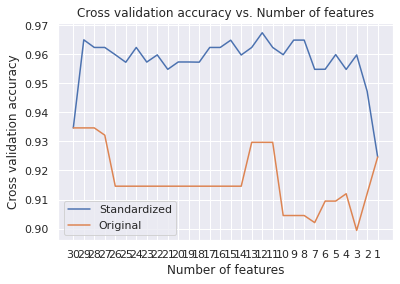

In [13]:
# Normalize
X_train_norm=X_train.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_norm)
X_norm = scaler.transform(X_train_norm)

X_test_norm=X_test.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_test_norm)
X_test_norm = scaler.transform(X_test_norm)

#2
StandardizedFS=Feature_selector(X_norm, y_train, tr=0.95)
import matplotlib.pyplot as plt
F=['30', '29','28','27','26','25','24','23','22','21','20','19','18','17','16','15','14','13','12','11','10','9','8','7','6','5','4','3','2','1']
StandardizedAC=StandardizedFS[0]
StandardizedK=StandardizedFS[1]
StandardizedFN=StandardizedFS[2]

plt.plot(F,StandardizedAC,label="Standardized")
plt.plot(F,AC, label="Original")
plt.xlabel('Number of features')
plt.ylabel("Cross validation accuracy")
plt.title("Cross validation accuracy vs. Number of features")
plt.legend()

In [14]:
#3 
#Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?) 
#As shown in the plot, the cross validation accuracy is higher then the original ones after standardizing. Standardize the data can uniform the scale, which alllow us to better compare them. 
index_of_maxCVA=StandardizedAC.index(max(StandardizedAC))
print("K value:", StandardizedK[index_of_maxCVA])
print("Feature Name: to delete", StandardizedFN[0:index_of_maxCVA])
print("How many features deleted:", index_of_maxCVA+1)
print("how many features left:", (30-index_of_maxCVA)-1)
print(max(StandardizedAC))
#maximum accuracy score for full model after standardization is 0.9674367088607594

K value: 6
Feature Name: to delete ['no feature drop', 'mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean fractal dimension', 'mean concave points', 'texture error', 'perimeter error', 'compactness error', 'smoothness error', 'symmetry error', 'concavity error', 'worst perimeter', 'concave points error']
How many features deleted: 19
how many features left: 11
0.9674050632911392


## Part 5: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results. **[0.5]**

In [21]:
from sklearn.metrics import accuracy_score

df_test = pd.DataFrame(X_test_norm, columns= dataset.feature_names)
df_test = df_test.drop(columns = StandardizedFN[1:(index_of_maxCVA+1)])  #remove 26 columns for test dataset
df_test.insert(12, "target", y_test)


knn_test = KNeighborsClassifier(n_neighbors = StandardizedK[index_of_maxCVA])   
knn_test.fit(df_test, y_test)
ypred = knn_test.predict(df_test)
accuracy_test = accuracy_score(y_test, ypred)
print(accuracy_test)

#our model has a high  accuracy on the held out test data (30% of the original dataset).The accuracy score is high in this test data, which might cause overfiting the model. 

0.9941520467836257


References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/